### Practical implementation of k-means clustering

1. Practical implementation of k-means clustering
Great job! Now we are entering the final and the most important part of this course - we will implement a segmentation project with k-means clustering using the data we have prepared in the previous lessons.

2. Key steps
The key steps of the segmentation projects are the following ones: First, we pre-process the data, which we covered in the previous lessons. Then, we have to choose the number of clusters as k-means requires that number to be passed to it. We will then run the k-means clustering and receive a list of cluster labels for each customer. Finally, we will analyze the average recency, frequency and monetary values for each cluster and compare them.

3. Data pre-processing
As we have already covered data pre-processing in the previous lesson, we will just reiterate the learnings: We have the raw and the pre-processed datasets loaded as datamart_rfm and datamart_normalized respectively. The code that we used to create the normalized version first unskewed the data with a log transformation. It then normalized it with the StandardScaler() which ultimately centers the data by subtracting its mean values. Finally, it scales it by dividing it by standard deviation.

4. Methods to define the number of clusters
When running k-means you will have to pass the number of clusters. This decision is not an easy one, if there are no data supporting the choice. Fortunately, there are various methods to get a good estimate on what it should be: We will use visual methods such as elbow criterion since they are easy to interpret and give a good estimation. There are also mathematical methods like silhouette coefficient which is useful when trying to find a model with better defined clusters. Not without its caveats, but still commonly used. We won't be using this method for our segmentation project. Finally, it's important to understand that these methods should be interpreted as advisory as we are segmenting customers. Each solution's interpretation should make sense for the business first, and be actionable.

5. Running k-means
Running k-means is a pretty straightforward process: First we import KMeans from the scikit-learn library. Then we initialize the model by passing the number of clusters and any integer as the random state. Then, we compute the k-means clustering on our pre-processed data with the fit() function. Finally we extract the computer cluster labels. That's it!

6. Analyzing average RFM values of each cluster
The next step is to analyze how these clusters differ from each other, and we will do that with the raw data. First, we will create a new dataframe that has raw RFM columns, plus a cluster column which we add with the assign() command. Then we take the new DataFrame and calculate average RFM values for each cluster, and count the number of observations in each cluster.

7. Analyzing average RFM values of each cluster
The result is a simple table where we see how these two segments differ from each other. It's clear that segment 0 has customers who have not been very recent, are much less frequent with their purchases and their monetary value is much lower than that of segment 1. This is already a clear distinction and quite a useful segmentation. We will see in the next lesson that more insights can be uncovered by increasing the number of segments.

8. Let's practice running k-means clustering!
Now it's your turn to practice running k-means clustering algorithm!

### Run k-means
You will now build a 3 clusters with k-means clustering. We have loaded the pre-processed RFM dataset as datamart_normalized. We have also loaded the pandas library as pd.

You can explore the dataset in the console to get familiar with it.

In [ ]:
Import KMeans from the scikit-learn library.
Initialize KMeans with 3 clusters and random state 1.
Fit k-means clustering on the normalized data set.
Extract cluster labels and store them as cluster_labels.

In [ ]:
# Import KMeans 
from sklearn.cluster import KMeans

# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(datamart_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

### Assign labels to raw data
You will now analyze the average RFM values of the three clusters you've created in the previous exercise. We have loaded the raw RFM dataset as datamart_rfm, and the cluster labels as cluster_labels. pandas is available as pd.

Feel free to explore the date in the console.

In [ ]:
Create a new DataFrame by adding a cluster label column to datamart_rfm.
Create a groupby element on a Cluster column.
Calculate average RFM values and segment sizes per each Cluster value.

In [ ]:
In [1]:
datamart_rfm
Out[1]:

            Recency  Frequency  MonetaryValue
CustomerID                                   
12747             3         25         948.70
12748             1        888        7046.16
12749             4         37         813.45
12820             4         17         268.02
12822            71          9         146.15
...             ...        ...            ...
18280           278          2          38.70
18281           181          2          31.80
18282             8          2          30.70
18283             4        152         432.93
18287            43         15         395.76

[3643 rows x 3 columns]

In [ ]:
# Create a DataFrame by adding a new cluster label column
datamart_rfm_k3 = datamart_rfm.assign(Cluster=cluster_labels)

# Group the data by cluster
grouped = datamart_rfm_k3.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
  }).round(1)

### Choosing the number of clusters
1. Choosing number of clusters
Great work! Now we will learn how to choose the number of clusters we want to use with k-means.

2. Methods
We have learned in the previous lesson that there are several ways to do this - visually, mathematically, or experimenting with different clusters and interpreting the results. We will focus on the elbow criterion and the experimentation. First, we will learn how to identify the best advised number of segments by elbow criterion method. Then, we will experiment with several numbers of clusters around it.

3. Elbow criterion method
The elbow criterion method plots the sum of squared errors for each number of segments. The sum of squared errors is basically the sum of squared distances from each data point to their cluster center. We then look at the chart to identify where the decrease in SSE slows down and becomes somewhat marginal. That point looks like an elbow of a bended arm and it shows where there are diminishing returns by increasing the number of clusters. This point represents the optimal number of clusters from a sum-of-squared errors perspective. However, we should choose several options around the elbow to test what makes most sense.

4. Elbow criterion method
Let's take a look at the code to build the elbow criterion plot. We are using a dummy data to emphasize the concept. First, we import the key libraries for plotting and kmeans. Then, we create an empty dictionary called SSE, abbreviation for sum of squared errors, and we run a for loop over different number of clusters, between 1 and 10. For each iteration we build a kmeans segmentation on the pre-processed data. The fitted kmeans model already has a sum of squared errors calculated and stored as inertia. We will assign it to the dictionary we created. Finally we plot the number of clusters stored as keys in the dictionary on the x axis, and the sum-of-squared error values on the y axis.

5. Elbow criterion method
And here's what we get: the elbow plot! The way to look at it is try to find the point with the largest angle which is the so-called elbow.

6. Elbow criterion method
The point at 4 clusters is where we identify the largest angle, and this is the elbow we've been looking for.

7. Using elbow criterion method
It's important to understand that building segmentation only at that number of clusters is not a hard rule. Generally, it should be taken as a recommended number and we should test several segmentation approaches. Here we can see the elbow plot for our RFM data. It's pretty clear the elbow is at the 2 cluster solution. But we will definitely test several approaches.

8. Experimental approach - analyze segments
Finally, there is the experimental approach to choose the number of customers which is best used after identifying an elbow or another computationally advised number of segments. For each of these numbers we will calculate the average RFM or other attribute values, and compare the solutions to identify the approach that is the most useful and provides most insight.

9. Experimental approach - analyze segments
For example, the elbow criterion plot for RFM data advised 2 clusters, therefore, we should at least build segmentation based on 2 and 3 clusters, and compare the outputs. As we can see, the 3 segment solution still has more story to it. While it does identify the least attractive segments and cluster number 1, it does break down the higher value segments into two: segment zero and segment two. It's up to the analyst and the business partners to review the segments and make the call on which solutions make more sense.

10. Let's practice finding the optimal number of clusters!
Now, you will run some calculations to build the elbow criterion plot!

### Calculate sum of squared errors
In this exercise, you will calculate the sum of squared errors for different number of clusters ranging from 1 to 15. In this example we are using a custom created dataset to get a cleaner elbow read.

We have loaded the normalized version of data as data_normalized. The KMeans module from scikit-learn is already imported. Also, we have initialized an empty dictionary to store sum of squared errors as sse = {}.

Feel free to explore the data in the console.

In [ ]:
Fit KMeans and calculate SSE for each k with a range between 1 and 15.
Initialize KMeans with k clusters and random state 1.
Fit KMeans on the normalized dataset.
Assign sum of squared distances to k element of sse dictionary.

In [ ]:
In [1]:
data_normalized
Out[1]:

array([[2.52708422e+02, 2.26887387e-01, 2.79783295e+02],
       [6.34659445e+02, 3.75435617e+00, 2.09792134e-01],
       [3.20225017e+02, 9.78334290e+01, 2.03873785e-01],
       [1.42556813e+03, 1.63217832e+00, 1.20068758e+02],
       [4.59116298e+02, 5.38109175e+00, 1.86682390e-01],
       [4.30180615e+02, 2.91116438e-02, 2.10073960e-01],
       [1.30596730e+03, 6.48155812e-02, 4.14397911e-01],
       [1.16128889e+03, 9.83489927e-01, 2.26701702e-01],
       [9.33661508e+02, 6.37759266e+00, 2.13455874e-01],
       [7.23395541e+02, 1.40707883e+01, 3.86773691e+01],
       [5.24703848e+02, 1.06993738e+01, 2.27547181e-01],
       [7.13750313e+02, 9.16938263e-02, 6.04348728e-01],
       [6.71311311e+02, 1.17424101e+01, 1.97673610e-01],
       [8.70003005e+02, 8.56763087e-02, 2.89548931e-01],

In [ ]:
# Fit KMeans and calculate SSE for each k
for k in range(1, 15):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(data_normalized)
    
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_ 

### Plot sum of squared errors
Now you will plot the sum of squared errors for each value of k and identify if there is an elbow. This will guide you towards the recommended number of clusters to use.

The sum of squared errors is loaded as a dictionary called sse from the previous exercise. matplotlib.pyplot was loaded as plt, and seaborn as sns.

You can explore the dictionary in the console.

In [ ]:
Add the plot title "The Elbow Method".
Add the X-axis label "k".
Add the Y-axis label "SSE".
Plot SSE values for each k stored as keys in the dictionary.

In [ ]:
# Add the plot title "The Elbow Method"
plt.title('The Elbow Method')

# Add X-axis label "k"
plt.xlabel('k')

# Add Y-axis label "SSE"
plt.ylabel('SSE')

# Plot SSE values for each key in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

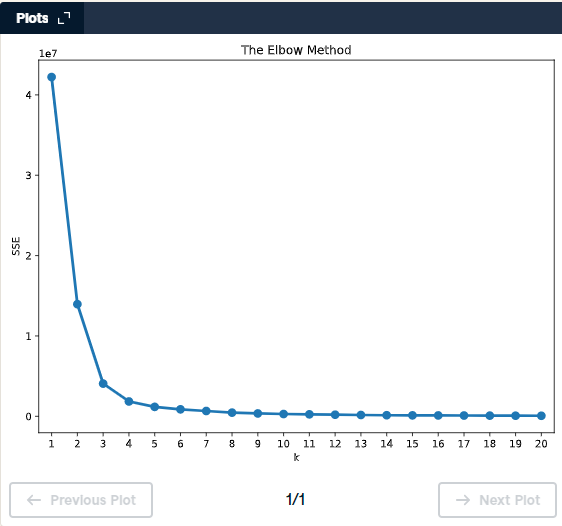

In [1]:
from IPython.display import Image
Image("elbow.png")

Congratulations! You can see the elbow is clearly around 3-4 clusters!

### Profile and interpret segments

1. Profile and interpret segments
Great work on finding the right number of clusters to begin our segmentation! Now we will learn how to profile and interpret our segments.

2. Approaches to build customer personas
The are multiple ways to build customer personas. You have already seen the approach where we assign the cluster label to the original dataset and then calculate average values of each cluster. Another approach is to use snake plots - a chart that visualizes RFM values between the segments. You also need to know how to calculate the relative importance of each cluster's attributes compared to the population average.

3. Summary statistics of each cluster
Ok! We will now calculate average RFM values for each of the 2 segments we have built previously. First, we create a new dataframe that combines RFM values from our original dataset and the Cluster labels from the 2-cluster k-means solution. Then we aggregate RFM values and calculate their averages. Finally, we compare this against a 3-cluster solution.

4. Summary statistics of each cluster
As you can see there are some inherent differences between the 2-segment and 3-segment solutions. While the former is simpler, the 3-segment solution gives more insights.

5. Snake plots to understand and compare segments
Great! Now we will learn about snake plots. Snake plots are a market research visualization technique plotting segments and their RFM values on a line chart. We need to normalize the data so the values would be comparable. Finally, we plot each cluster's average values on a line plot.

6. Prepare data for a snake plot
Let's code the snake plot now! First, we create a DataFrame from our normalized NumPy array. We will pass it to the pandas DataFrame function, and use the index and columns from the original datamart_rfm. Then we will assign a cluster label from the datamart_rfm_k3 dataset. For easier plotting, we will melt the dataset into a long format. We basically melt the three RFM columns and create one called attribute. The attribute column will store the name of the metric, and then store its value into another column.

7. Visualize a snake plot
Finally, we can visualize the snake plot. We add the title and then use the lineplot function from seaborn package. We pass the attribute to the X axis, and the value to the Y axis. Finally, we pass the cluster label to the hue argument, which will draw separate lines for each cluster. And here's the snake plot - it makes it very easy and intuitive to interpret, compare the segments and identify interesting insights.

8. Relative importance of segment attributes
Now there is another technique, slightly different from the snake plot, although the underlying data preparation is similar. In general, we want our segments to differ from the overall population, and have distinctive properties of their own. We can use this technique to identify relative importance of each attribute. First, we calculate the average RFM values for each cluster. Then, we do the same for the total population. Finally, we divide the two, and subtract 1 from the result.

9. Analyze and plot relative importance
The result is a relative importance score for each RFM value of the segments. The further that ratio is from zero, the more important that attribute is for defining a specific cluster compared to the population average. We can view it by just looking at rounded values, or we can plot a heatmap which we used in our first lesson on cohort analysis.

10. Relative importance heatmap
Here we go - the heatmap plot is easier to interpret, and it contains the actual numeric values as well. If you compare it to the previous printed output, it's clear that the heatmap has a visual advantage over the print() statement.

11. Your time to experiment with different customer profiling techniques!
Great job everybody! Now it's your time to experiment with these techniques!



### Prepare data for the snake plot
Now you will prepare data for the snake plot. You will use the 3-cluster RFM segmentation solution you have built previously. You will transform the normalized RFM data into a long format by "melting" the metric columns into two columns - one for the name of the metric, and another for the actual numeric value.

We have loaded the normalized RFM data with the cluster labels already assigned. It is loaded as apandas DataFrame named datamart_normalized. Also, pandas is imported as pd.

Explore the datamart_normalized in the console before you begin the exercise to get a good sense of its structure!

Transform the dataset into long format by applying melt function on the normalized dataset with a reset index.
Assign CustomerID and Cluster as ID variables.
Assign RFM values as value variables.
Name the variable as Metric and the value as Value.

In [ ]:
In [1]:
datamart_normalized
Out[1]:

            Recency  Frequency  MonetaryValue  Cluster
CustomerID                                            
12747        -2.002      0.865          1.465        2
12748        -2.815      3.815          2.995        2
12749        -1.789      1.189          1.348        2
12820        -1.789      0.546          0.501        2
12822         0.337      0.021          0.038        1
...             ...        ...            ...      ...
18280         1.347     -1.222         -0.976        0
18281         1.029     -1.222         -1.126        0
18282        -1.277     -1.222         -1.152        0
18283        -1.789      2.357          0.866        2
18287        -0.033      0.443          0.798        1

[3643 rows x 4 columns]

In [ ]:
# Melt the normalized dataset and reset the index
datamart_melt = pd.melt(
  					datamart_normalized.reset_index(), 
                        
# Assign CustomerID and Cluster as ID variables
                    id_vars=['CustomerID', 'Cluster'],

# Assign RFM values as value variables
                    value_vars=['Recency', 'Frequency', 'MonetaryValue'], 
                        
# Name the variable and value
                    var_name='Metric', value_name='Value'
					)

In [ ]:
In [3]:
datamart_melt
Out[3]:

       CustomerID  Cluster         Metric  Value
0           12747        2        Recency -2.002
1           12748        2        Recency -2.815
2           12749        2        Recency -1.789
3           12820        2        Recency -1.789
4           12822        1        Recency  0.337
...           ...      ...            ...    ...
10924       18280        0  MonetaryValue -0.976
10925       18281        0  MonetaryValue -1.126
10926       18282        0  MonetaryValue -1.152
10927       18283        2  MonetaryValue  0.866
10928       18287        1  MonetaryValue  0.798

[10929 rows x 4 columns]

### Visualize snake plot
Good work! You will now use the melted dataset to build the snake plot. The melted data is loaded as datamart_melt.

The seaborn library is loaded as sns and matplotlib.pyplot is available as plt.

You can use the console to explore the melted dataset.

In [ ]:
Add the plot title.
Add the X-axis label "Metric".
Add the Y-axis label "Value".
Plot a line for each value of the Cluster in datamart_melt.

In [ ]:
# Add the plot title
plt.title('Snake plot of normalized variables')

# Add the x axis label
plt.xlabel('Metric')

# Add the y axis label
plt.ylabel('Value')

# Plot a line for each value of the cluster variable
sns.lineplot(data=datamart_melt, x='Metric', y='Value', hue='Cluster')
plt.show()

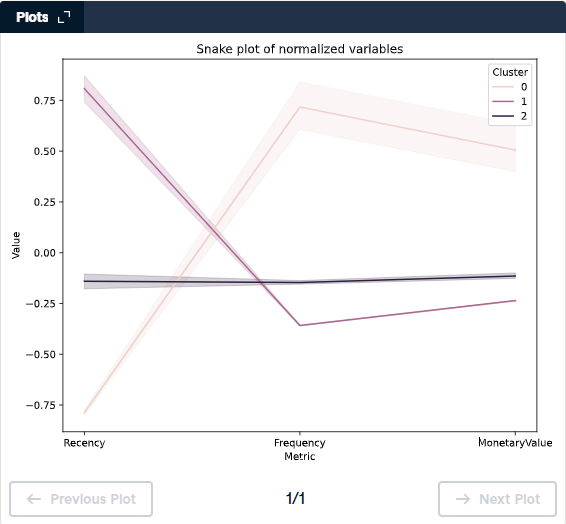

In [3]:
Image("snakeplot.png")

### Calculate relative importance of each attribute
Now you will calculate the relative importance of the RFM values within each cluster.

We have loaded datamart_rfm with raw RFM values, and datamart_rfm_k3 which has raw RFM values and the cluster labels stored as Cluster. The pandas library is also loaded as pd.

Feel free to explore the datasets in the console.

Calculate average RFM values for each cluster - use datamart_rfm_k3 dataset.
Calculate average RFM values for the total customer population - use datamart_rfm dataset.
Calculate relative importance of cluster's attribute value compared to population.
Print relative importance scores rounded to 2 decimals.

In [ ]:
# Calculate average RFM values for each cluster
cluster_avg = datamart_rfm_k3.groupby(['Cluster']).mean() 

# Calculate average RFM values for the total customer population
population_avg = datamart_rfm.mean()

# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1

# Print relative importance scores rounded to 2 decimals
print(relative_imp.round(2))

In [ ]:
<script.py> output:
             Recency  Frequency  MonetaryValue
    Cluster                                   
    0           0.84      -0.84          -0.86
    1          -0.15      -0.35          -0.42
    2          -0.82       1.67           1.82

Perfect! You can clearly see the differences in relative attribute importance of each of the segment!

### Plot relative importance heatmap
Great job! Now you will build a heatmap visualizing the relative scores for each cluster.

We have loaded the relative importance scores as relative_imp. The seaborn library is loaded as sns and the pyplot module from matplotlib is available as plt.

In [ ]:
Initialize a plot with a figure size of 8 by 2 inches.
Add the plot title.
Plot the heatmap on relative_imp data.

In [ ]:
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(8, 2))

# Add the plot title
plt.title('Relative importance of attributes')

# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

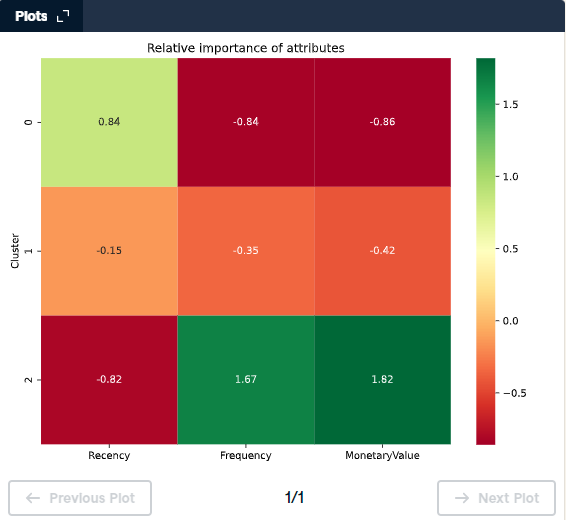

In [4]:
Image("heatmap.png")

### End-to-end segmentation solution

1. Implement end-to-end segmentation solution
Fantastic work! You are now fully equipped to build end-to-end customer segmentation projects and that's what we're going to do now.

2. Key steps of the segmentation project
Now, let's recap the key steps of the segmentation project. First, you gather the data. You will use an updated dataset that has recency, frequency and monetary values from the previous lessons, and an additional variable to make this more interesting. Then, you will pre-process the data to ensure k-means clustering works as expected. Next, you will use the techniques from the previous lessons to identify the number of clusters. Finally, you will run the k-means clustering, and then use various analysis and visualization techniques to interpret the results.

3. Updated RFM data
Now, we have created an updated version of our RFM dataset. The additional variable called tenure has been added. This value is calculated as the time since the first transaction, as opposed to recency which is the time since the customer's last transaction. Ultimately, it defines how long the customer has been with the company since their first transaction. And here's the data - as you can see it has the RFM values as previously, and the new tenure feature as the last column.

4. Goals for this project
Now that you've seen the data, you can start working on the final segmentation project. The main goals for running this end-to-end segmentation solution are: First, remember the key pre-processing rules and steps. Second, apply data exploration techniques and identify the number of segments to be used. Then, you will practice running several k-means iterations, and interpret the results by applying quantitative and visual techniques.

5. Let's dig in!
Great job, now let's start working on this segmentation project, good luck!

### Pre-process data
First step in the segmentation process is to pre-process the data. You will apply log transformation, and then normalize the data to prepare it for clustering.

We have loaded the dataset with RFMT values as datamart_rfmt. Also, the pandas library is loaded as pd, and numpy as np.

Please feel free to explore the expanded RFMT dataset in the console.

Import StandardScaler, initialize it, ad store as scaler.
Apply log transformation to the raw RFMT data.
Initialize the scaler and fit it on the log-transformed data.
Transform and store the scaled data as datamart_rfmt_normalized.

In [ ]:
In [1]:
datamart_rfmt
Out[1]:

            Recency  Frequency  MonetaryValue  Tenure
CustomerID                                           
12747             3         25         948.70     362
12748             1        888        7046.16     365
12749             4         37         813.45     214
12820             4         17         268.02     327
12822            71          9         146.15      88
...             ...        ...            ...     ...
18280           278          2          38.70     278
18281           181          2          31.80     181
18282             8          2          30.70       8
18283             4        152         432.93     338
18287            43         15         395.76     202

[3643 rows x 4 columns]

In [ ]:
# Import StandardScaler 
from sklearn.preprocessing import StandardScaler

# Apply log transformation
datamart_rfmt_log = np.log(datamart_rfmt)

# Initialize StandardScaler and fit it 
scaler = StandardScaler(); scaler.fit(datamart_rfmt_log)

# Transform and store the scaled data as datamart_rfmt_normalized
datamart_rfmt_normalized = scaler.transform(datamart_rfmt_log)

In [ ]:
datamart_rfmt_log
Out[3]:

            Recency  Frequency  MonetaryValue  Tenure
CustomerID                                           
12747         1.099      3.219          6.855   5.892
12748         0.000      6.789          8.860   5.900
12749         1.386      3.611          6.701   5.366
12820         1.386      2.833          5.591   5.790
12822         4.263      2.197          4.985   4.477
...             ...        ...            ...     ...
18280         5.628      0.693          3.656   5.628
18281         5.198      0.693          3.459   5.198
18282         2.079      0.693          3.424   2.079
18283         1.386      5.024          6.071   5.823
18287         3.761      2.708          5.981   5.308

[3643 rows x 4 columns]

In [ ]:
In [2]:
datamart_rfmt_normalized
Out[2]:

array([[-2.00220213,  0.865157  ,  1.4649405 ,  0.91969471],
       [-2.81451782,  3.81527235,  2.99469233,  0.92875045],
       [-1.78948954,  1.18911731,  1.34759823,  0.34290634],
       ...,
       [-1.27697541, -1.22195523, -1.15248482, -3.26323697],
       [-1.78948954,  2.35670574,  0.86642248,  0.84442534],
       [-0.03348042,  0.44304102,  0.79793723,  0.27958601]])

### Calculate and plot sum of squared errors
Now, you will calculate the sum of squared errors for different number of clusters ranging from 1 to 10.

You will use the normalized RFMT data that you created in the previous exercise, it is stored as datamart_rfmt_normalized. The KMeans module from scikit-learn is also imported. Also, we have initialized an empty dictionary to store sum of squared errors as sse = {}.

Feel free to explore the date in the console.

Initialize KMeans with k clusters and random state 1 and fit KMeans on the normalized dataset.
Assign sum of squared distances to k element of sse dictionary.
Add the plot title "The Elbow Method", X-axis label "k", and Y-axis label "SSE".
Plot SSE values for each k stored as keys in the dictionary.

In [ ]:
# Fit KMeans and calculate SSE for each k between 1 and 10
for k in range(1, 11):
  
    # Initialize KMeans with k clusters and fit it 
    kmeans = KMeans(n_clusters=k, random_state=1 ).fit(datamart_rfmt_normalized)
    
    # Assign sum of squared distances to k element of the sse dictionary
    sse[k] = kmeans.inertia_   

# Add the plot title, x and y axis labels
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')

# Plot SSE values for each k stored as keys in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

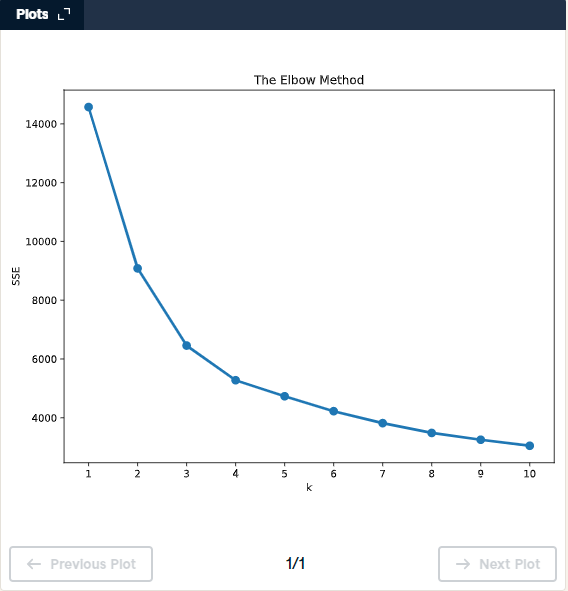

In [5]:
Image("elbow_rfmt.png")

Perfect! The elbow is visible around 3-4 clusters!

### Build 4-cluster solution
Perfect, you can see the the recommended number of clusters is somewhere between 3 and 4. Now, you will build the latter number of clusters in this exercise.

The normalized RFMT dataset is available as datamart_rfmt_normalized, feel free to use the console to explore it.

Import KMeans from sklearn library.
Initialize KMeans with 4 clusters and random state 1.
Fit k-means clustering on the normalized data set.
Extract cluster labels and store them as cluster_labels object.

In [ ]:
# Import KMeans 
from sklearn.cluster import KMeans

# Initialize KMeans
kmeans = KMeans(n_clusters=4, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(datamart_rfmt_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

This is it! You have built 4-cluster segmentation and can now use it to create customer personas!

### Analyze the segments
Fantastic! Final step - analyzing your segmentation solution - you will analyze the average Recency, Frequency, MonetaryValue and Tenure values for each of the four segments you have built previously. Take some time to analyze them and understand what kind of customer groups and behaviors they represent.

The RFMT raw data is available as datamart_rfmt, and the cluster labels from the previous exercise is loaded as cluster_labels. We have also loaded the pandas library as pd.

Create a new DataFrame by adding a cluster label column to datamart_rfmt.
Create a groupby element on a Cluster column.
Calculate average RFMT values and segment sizes per each Cluster value.

In [ ]:
# Create a new DataFrame by adding a cluster label column to datamart_rfmt
datamart_rfmt_k4 = datamart_rfmt.assign(Cluster=cluster_labels)

# Group by cluster
grouped = datamart_rfmt_k4.groupby(['Cluster'])

# Calculate average RFMT values and segment sizes for each cluster
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean',
    'Tenure': ['mean', 'count']
  }).round(1)

### Final thoughts
1. Final thoughts
Congratulations on completing this course on Customer segmentation in Python! You have explored a lot of different techniques to group customers!

2. What you have learned
You have learned the technique called cohort analysis and how to use it to group customers into simple behavioral segments and visualize them in attractive and intuitive ways. You have then explored segmentation method using recency, frequency and monetary value metrics, or simply RFM segmentation. Then, you have have learned how to pre-process RFM data to make sure k-means can discover meaningful segments. Finally, you have built segmentation solutions with k-means clustering algorithm by evaluating the recommended number of clusters, and then analyzing and visualizing different segmentation solutions to identify interesting customer personas.

3. Congratulations!
Once again, congratulations on finishing this course, and I am looking forward to see you in other courses!